In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

## Dataset 2

In [2]:
data2 = pd.read_csv('datasets/housing_data.csv')
data2 = np.asarray(data2)

cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
data2.shape

(505, 14)

### Plot/visualize

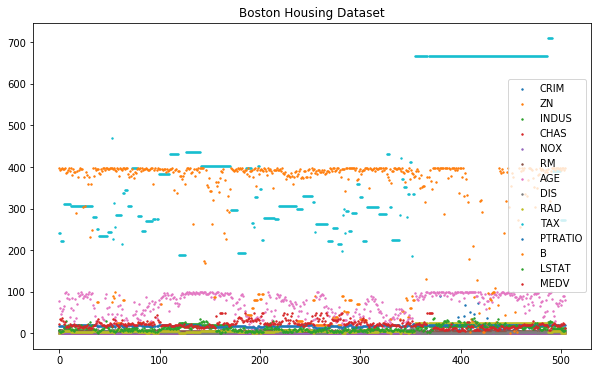

In [4]:
for idx, col in enumerate(cols):
    feature = data2[:, idx]
    plt.scatter(np.arange(len(feature)), feature, label=col, s=2)
    
plt.title('Boston Housing Dataset')
plt.legend()
plt.show()

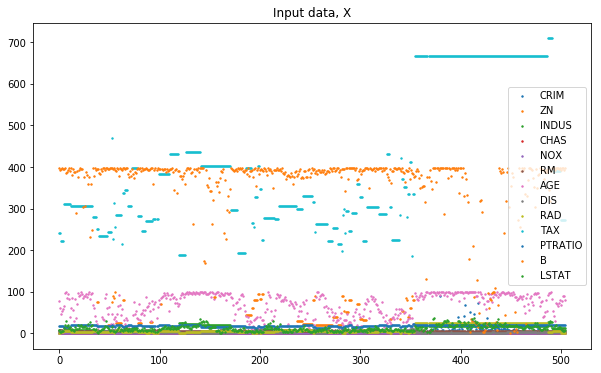

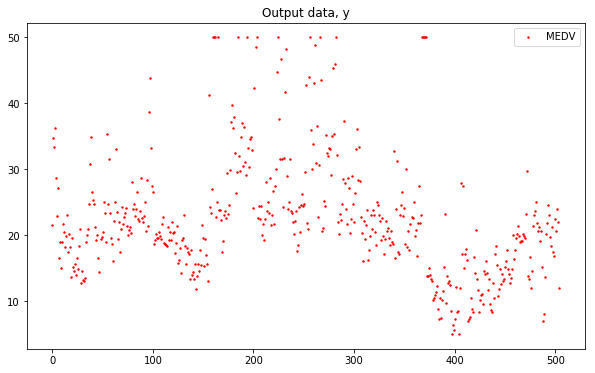

In [5]:
medv_idx = cols.index('MEDV')
y_ = data2[:, medv_idx]

data2_copy = np.copy(data2)
data2_copy = np.delete(data2_copy, medv_idx, axis=1)

X_ = data2_copy

for idx, col in enumerate(cols):
    if idx == medv_idx:
        pass
    elif idx > medv_idx:
        feature = X_[:, idx-1]
        plt.scatter(np.arange(len(feature)), feature, label=col, s=2)
    else:
        feature = X_[:, idx]
        plt.scatter(np.arange(len(feature)), feature, label=col, s=2)
    
plt.title('Input data, X')
plt.legend()
plt.show()

plt.scatter(np.arange(len(y_)), y_, label='MEDV', s=2, c='r')
plt.title('Output data, y')
plt.legend()
plt.show()

### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def rmse(y_1, y_2):
    return np.sqrt(mean_squared_error(y_1, y_2))

In [7]:
# randomly shuffling arrays
p = np.random.permutation(X_.shape[0])
X = X_[p]
y = y_[p]

print(X.shape)
print(y.shape)

(505, 13)
(505,)


##### Vanilla Linear Regression

In [8]:
model = LinearRegression()

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
    print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
    print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

RMSE Training for fold 0 = 4.659237969582309
RMSE Testing for fold 0 = 5.047972506320891
RMSE Training for fold 1 = 4.699491479313372
RMSE Testing for fold 1 = 4.498818396831241
RMSE Training for fold 2 = 4.761493477201031
RMSE Testing for fold 2 = 3.8832300690386674
RMSE Training for fold 3 = 4.7129843052421245
RMSE Testing for fold 3 = 4.384681120541463
RMSE Training for fold 4 = 4.509566059307196
RMSE Testing for fold 4 = 6.052508186287114
RMSE Training for fold 5 = 4.743022954403683
RMSE Testing for fold 5 = 4.112053446610877
RMSE Training for fold 6 = 4.605145739235757
RMSE Testing for fold 6 = 5.341152296861515
RMSE Training for fold 7 = 4.717088210704872
RMSE Testing for fold 7 = 4.390240794425266
RMSE Training for fold 8 = 4.669565388082749
RMSE Testing for fold 8 = 4.778990574623983
RMSE Training for fold 9 = 4.591515747765174
RMSE Testing for fold 9 = 5.468143399769904
--
RMSE Training average = 4.666911133083826
RMSE Testing average  = 4.795779079131092
RMSE overall = 4.6760

##### LR with Ridge Regularization

In [9]:
alpha = 5 # FIND BEST ALPHA
model = Ridge(alpha=alpha)

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
    print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
    print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

RMSE Training for fold 0 = 4.754538026344752
RMSE Testing for fold 0 = 4.718829529628113
RMSE Training for fold 1 = 4.756050078159579
RMSE Testing for fold 1 = 4.646558584724706
RMSE Training for fold 2 = 4.816990918934265
RMSE Testing for fold 2 = 4.056549841376741
RMSE Training for fold 3 = 4.777137025731697
RMSE Testing for fold 3 = 4.43763207686583
RMSE Training for fold 4 = 4.5633461944087825
RMSE Testing for fold 4 = 6.203316633582265
RMSE Training for fold 5 = 4.8062867958656845
RMSE Testing for fold 5 = 4.197326181714853
RMSE Training for fold 6 = 4.667131979816546
RMSE Testing for fold 6 = 5.403893567989104
RMSE Training for fold 7 = 4.77547946805275
RMSE Testing for fold 7 = 4.508280593591988
RMSE Training for fold 8 = 4.725758429704161
RMSE Testing for fold 8 = 4.938662211267369
RMSE Training for fold 9 = 4.664601523055321
RMSE Testing for fold 9 = 5.40515534149761
--
RMSE Training average = 4.730732044007354
RMSE Testing average  = 4.851620456223857
RMSE overall = 4.7363816

##### LR with Lasso Regularization

In [10]:
alpha = 5 # FIND BEST ALPHA
model = Lasso(alpha=alpha)

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
    print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
    print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

RMSE Training for fold 0 = 6.11065711175887
RMSE Testing for fold 0 = 5.6373378135804675
RMSE Training for fold 1 = 6.072161349154012
RMSE Testing for fold 1 = 6.032057281973664
RMSE Training for fold 2 = 6.174958452747978
RMSE Testing for fold 2 = 5.20488999241939
RMSE Training for fold 3 = 6.086695785000307
RMSE Testing for fold 3 = 6.11104616637788
RMSE Training for fold 4 = 5.980929839936961
RMSE Testing for fold 4 = 6.977691304402021
RMSE Training for fold 5 = 6.012463744591267
RMSE Testing for fold 5 = 6.685457041403102
RMSE Training for fold 6 = 6.137382872342515
RMSE Testing for fold 6 = 5.6779201785020454
RMSE Training for fold 7 = 6.093875127571257
RMSE Testing for fold 7 = 5.552553905578989
RMSE Training for fold 8 = 6.006239625227021
RMSE Testing for fold 8 = 6.718823524591908
RMSE Training for fold 9 = 6.034552522012074
RMSE Testing for fold 9 = 6.73640496799103
--
RMSE Training average = 6.070991643034226
RMSE Testing average  = 6.13341821768205
RMSE overall = 6.075719424

##### LR with Elastic Net Regularization

In [11]:
# a * L1 + b * L2
a = 0.1
b = 0.1

alpha = a + b
l1_ratio = a / (a + b)
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
    print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
    print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

RMSE Training for fold 0 = 4.882388606192232
RMSE Testing for fold 0 = 4.874269133350142
RMSE Training for fold 1 = 4.864640427539857
RMSE Testing for fold 1 = 4.813732888653941
RMSE Training for fold 2 = 4.922561188512414
RMSE Testing for fold 2 = 4.1753885045651105
RMSE Training for fold 3 = 4.89363848622196
RMSE Testing for fold 3 = 4.566974173951468
RMSE Training for fold 4 = 4.671946567832574
RMSE Testing for fold 4 = 6.2411628916494335
RMSE Training for fold 5 = 4.918998752921476
RMSE Testing for fold 5 = 4.471656311392162
RMSE Training for fold 6 = 4.7903164196754595
RMSE Testing for fold 6 = 5.297268821755318
RMSE Training for fold 7 = 4.892133454411452
RMSE Testing for fold 7 = 4.5958369480239725
RMSE Training for fold 8 = 4.837926297969182
RMSE Testing for fold 8 = 5.147569612091386
RMSE Training for fold 9 = 4.794658042347159
RMSE Testing for fold 9 = 5.408600553679632
RMSE Training average = 4.8469208243623765
RMSE Testing average  = 4.959245983911257
RMSE overall = 4.85517